In [1]:
import sys
sys.path.insert(0,'../PLASIM/')
import Learn2_new as ln
ut = ln.ut # utilities
ef = ln.ef # ERA_Fields_New

# log to stdout
import logging
import os
logging.getLogger().level = logging.INFO
logging.getLogger().handlers = [logging.StreamHandler(sys.stdout)]

# set spacing of the indentation
ut.indentation_sep = '  '

Could not import sliding_window_view from np.lib.stride_tricks. Using custom copy for numpy<1.20
Could not load field_infos: using the hardcoded version


In [2]:
import importlib as imp
imp.reload(ln)
imp.reload(ef)

path_to_ERA = '/mnt/homedafs-2.10/gmiloshe/Climate-Learning'/ERA/
Could not import sliding_window_view from np.lib.stride_tricks. Using custom copy for numpy<1.20
Could not load field_infos: using the hardcoded version
Trying to import basemap
Successfully imported basemap


<module 'ERA.ERA_Fields_New' from '/mnt/homedafs-2.10/gmiloshe/Climate-Learning/ERA/ERA_Fields_New.py'>

First valid path found in /homedata/gmiloshe/Climate-Learning/CESM/Data_CESM/CAM_landmask.nc
First valid path found in /homedata/gmiloshe/Climate-Learning/CESM/Data_CESM/CAM_landmask.nc
CESM.lat.data.min() = -90.0, CESM.lat.data.max() = 90.0, CESM.lat.data[1] - CESM.lat.data[0] = 0.9424057,  len(CESM.lat.data) = 192,


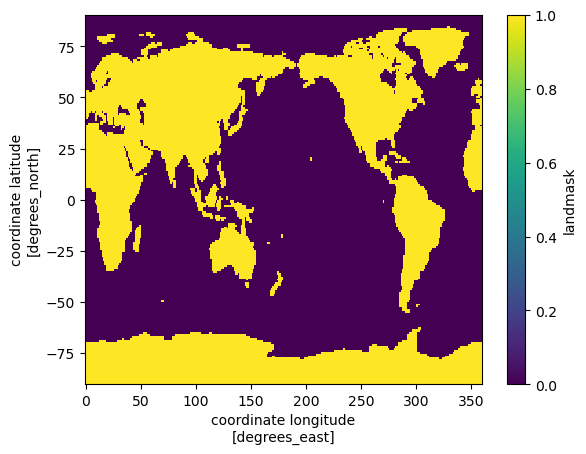

In [3]:
import matplotlib.pylab as plt
CESM = ef.get_lsm('/homedata/gmiloshe/Climate-Learning/CESM/','CESM', discretize=True,)
#plt.pcolormesh(CESM.data)
#plt.show()
CESM.plot()
print(f'{CESM.lat.data.min() = }, {CESM.lat.data.max() = }, {CESM.lat.data[1] - CESM.lat.data[0] = },  {len(CESM.lat.data) = },')

In [4]:
(CESM.lat.data.max()-CESM.lat.data.min())/(len(CESM.lat.data)-1), (CESM.lat.data.max()-CESM.lat.data.min())/(64)

(0.9424083769633508, 2.8125)

First valid path found in /homedata/gmiloshe/Climate-Learning/CESM/Data_CESM_100yrs/CAM_landmask.nc
First valid path found in /homedata/gmiloshe/Climate-Learning/CESM/Data_CESM_100yrs/CAM_landmask.nc


/homedata/gmiloshe/miniconda3/envs/tf2.6bm/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1785: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = super().pcolormesh(*args, **kwargs)


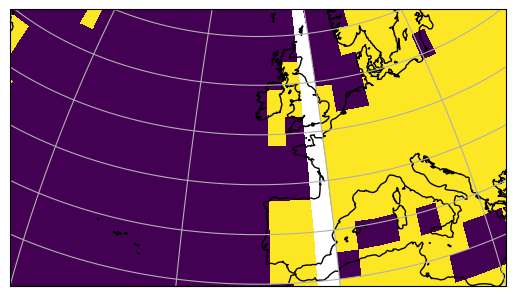

<xarray.DataArray 'landmask' (lat: 64, lon: 128)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])
Coordinates:
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86

In [5]:
import cartopy.crs as ccrs
import cartopy
CESM = ef.get_lsm('/homedata/gmiloshe/Climate-Learning/CESM/','CESM', discretize=True, lsmsource='Data_CESM_100yrs/CAM_landmask.nc')

central_lon, central_lat = -10, 45
extent = [-40, 20, 30, 60]
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat))
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')

ax.pcolormesh(CESM.lon.data, CESM.lat.data, CESM.data, transform=ccrs.PlateCarree())

plt.show()
CESM

In [6]:
import xarray as xr
TSA = xr.open_dataset('/homedata/gmiloshe/Climate-Learning/CESM/Data_CESM/North_Anomalies_TSA.nc')
#TSA = xr.open_dataset('/homedata/gmiloshe/Climate-Learning/CESM/Data_CESM_short/North_Anomalies_TSA.nc')
TSA

<xarray.Dataset>
Dimensions:    (time: 153000, bnds: 2, lon: 288, lat: 192)
Coordinates:
  * time       (time) object 0001-05-01 10:30:01 ... 0100-09-30 10:30:01
  * lon        (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * lat        (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    TSA        (time, lat, lon) float32 ...
Attributes: (12/19)
    CDI:                                  Climate Data Interface version 1.9....
    Conventions:                          CF-1.0
    history:                              Sun Mar 07 11:51:02 2021: cdo ydays...
    source:                               Community Land Model CLM4.0
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    ...                                   ...
    Initial_conditions_dataset:           clmi.BCN.2000-01-01_0.9x1.25_gx1v6_...
    PFT_physiological_constants_dataset:  pft-physiology.clm40.c130424.nc
    Time_constant_3Dvars_filename:        ./CAM4_F2000_p144_ctrl_batch_0001.c...
    Time_constant_3Dvars:                 ZSOI:DZSOI:WATSAT:SUCSAT:BSW:HKSAT
    frequency:                            day
    CDO:                                  Climate Data Operators version 1.9....

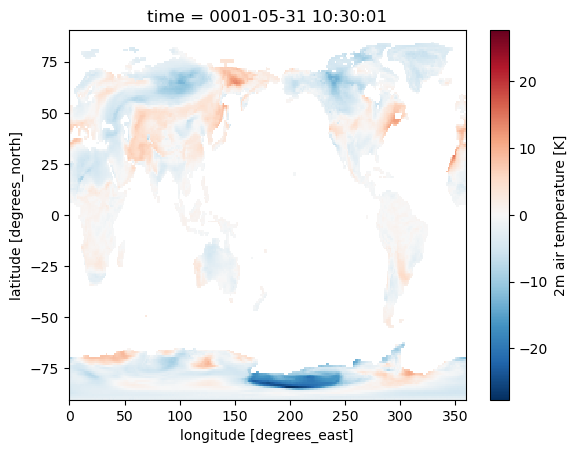

In [10]:
TSA.TSA.isel(time=30).plot()

## Below xesmf regidding is used

It was complicated to install xesmf on usual conda environment used in the rest of the repo so a separate one can be used.

In [1]:
import xarray as xr
TSA = xr.open_dataset('/homedata/gmiloshe/Climate-Learning/CESM/Data_CESM_100yrs/North_Anomalies_TSA.nc')
TSA

<xarray.Dataset>
Dimensions:  (time: 15300, lat: 64, lon: 128)
Coordinates:
  * time     (time) object 0001-05-01 10:30:01 ... 0100-09-30 10:30:01
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    TSA      (time, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

In [2]:
import cftime
import numpy as np
numerical_time = np.array([cftime.date2num(time, units='days since 1-01-01 00:00:00', calendar='noleap') for time in TSA.time])


In [3]:
import xarray as xr
import xesmf as xe

CONTROL_lsmask = xr.open_dataset('/homedata/gmiloshe/Climate-Learning/PLASIM/Data_Plasim_inter/CONTROL_lsmask.nc')


ds_out = xr.Dataset(
    {
        "lat": (["lat"], CONTROL_lsmask.lat.data),
        "lon": (["lon"], CONTROL_lsmask.lon.data),
    }
)

regridder = xe.Regridder(TSA, ds_out, "bilinear")
regridder

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_64x128_64x128.nc 
Reuse pre-computed weights? False 
Input grid shape:           (64, 128) 
Output grid shape:          (64, 128) 
Periodic in longitude?      False

In [5]:
TSA_out = regridder(TSA)

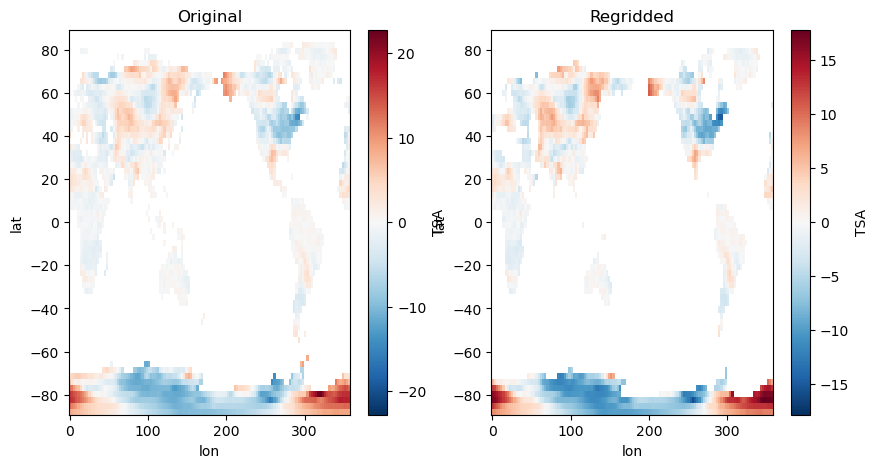

In [7]:
import matplotlib.pylab as plt
fig, axs = plt.subplots(ncols=2, figsize=(10,5))

# plot the original dataframe
TSA.TSA.isel(time=8000).plot(ax=axs[0])
axs[0].set_title('Original')

# plot the regridded dataframe
TSA_out.TSA.isel(time=8000).plot(ax=axs[1])
axs[1].set_title('Regridded')

plt.show()


In [ ]:
for field in ['TSA','H2OSOI','Z3.500hPa']:
    TSA = xr.open_dataset(f'/homedata/gmiloshe/Climate-Learning/CESM/Data_CESM_100yrs/North_Anomalies_{field}.nc')
    regridder = xe.Regridder(TSA, ds_out, "bilinear")
    TSA_out = regridder(TSA)
    TSA_out.to_netcdf(f'Data_CESM_100yrs/North_Anomalies_{field}.nc')
